In [ ]:
##Necessary Imports

In [63]:
import pandas as pd
from pathlib import Path
import numpy as np
import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [ ]:
#ETH APIs

In [49]:
import requests
headers = {'Authorization': 'Bearer ' + access_token}
eth_burn = "https://api.cryptoquant.com/v1/eth/network-data/fees-burnt?window=day"
print(requests.get(url, headers=headers).json())

NameError: name 'access_token' is not defined

In [6]:
eth_burn = requests.get(eth_burn_url).json()

In [7]:
print(json.dumps(eth_burn, indent=4, sort_keys=True))

{
    "result": {},
    "status": {
        "code": 401,
        "description": "401 Unauthorized: Token does not exist.",
        "message": "unauthorized"
    }
}


In [50]:
tickers = ["ETHUSD"]

# Set timeframe
timeframe = "1Day"

# Format current date as ISO format
start_date = pd.Timestamp("2020-04-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-25", tz="America/New_York").isoformat()

In [61]:
df_eth = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
ETHUSD = df_eth[df_eth['symbol']=='ETHUSD'].drop('symbol', axis=1)

#df_portfolio = pd.concat([ETHUSD, BTCUSD],axis=1, keys=['ETHUSD','BTCUSD'])


df_eth

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2020-04-25 05:00:00+00:00,CBSE,194.42,196.04,193.71,194.60,24324.842137,6805,195.115700,ETHUSD
2020-04-26 05:00:00+00:00,CBSE,197.80,199.41,196.61,197.74,34826.159206,7765,197.880861,ETHUSD
2020-04-27 05:00:00+00:00,CBSE,197.72,197.82,189.60,196.78,129753.688775,29131,194.079907,ETHUSD
2020-04-28 05:00:00+00:00,CBSE,196.64,200.00,196.64,199.10,37908.443267,8363,198.435146,ETHUSD
2020-04-29 05:00:00+00:00,CBSE,215.74,226.28,214.60,223.05,97995.751189,16774,220.691436,ETHUSD
...,...,...,...,...,...,...,...,...,...
2022-04-23 05:00:00+00:00,ERSX,2947.50,2977.60,2922.90,2952.80,342.013445,204,2945.310501,ETHUSD
2022-04-23 05:00:00+00:00,FTXU,2947.30,2978.90,2921.20,2952.00,5242.460000,3496,2943.934503,ETHUSD
2022-04-24 05:00:00+00:00,CBSE,2952.64,2968.31,2841.28,2865.89,80512.158789,455015,2903.325740,ETHUSD


<AxesSubplot:xlabel='volume'>

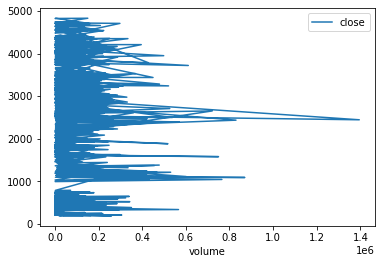

In [65]:
df_eth.plot(y='close', x='volume')

In [ ]:
##analyzes ethereum burn rate

In [55]:
eth_burn = eth_burn["result"]

KeyError: 'result'

In [ ]:
##production rate  

In [44]:
value = 6285.00
average_growth_rate = .097
days=365
production_rate = value*(1+average_growth_rate)**days
production_rate

2.9766265203073295e+18

In [ ]:
## difference between the two and historical effects/correlations with price

In [ ]:
##General Ethereum analysis

In [48]:
df_portfolio.describe()


,open,high,low,close,volume,trade_count,vwap
count,3322.000000,3322.000000,3322.00000,3322.000000,3.322000e+03,3.322000e+03,3322.000000
mean,19397.310686,19906.030331,18839.67882,19398.772848,3.327126e+04,9.321070e+04,19392.823468
std,21038.411581,21587.277134,20434.00306,21038.111468,7.966390e+04,1.755414e+05,21030.106190
min,186.220000,191.680000,176.43000,185.930000,2.000000e-03,1.000000e+00,184.951296
25%,2481.237500,2587.450000,2357.53500,2479.887500,6.430394e+02,5.515000e+02,2479.231443
50%,8495.365000,8699.715000,8216.75000,8516.000000,4.278685e+03,6.731000e+03,8613.773173
75%,40231.065000,41500.000000,39041.28500,40263.760000,2.071571e+04,7.297550e+04,40277.256178
max,68192.000000,69091.200000,66303.20000,68157.000000,1.394960e+06,1.456757e+06,67207.637648


In [ ]:
##std deviation

In [ ]:
##monte carlo of future returns based on mean reversion.

In [36]:
MC_eth = MCSimulation(
    portfolio_data = df_portfolio,
    weights = (.50, .50),
    num_simulation = 500,
    num_trading_days = 365*3
)

# Review the simulation input data
MC_eth.portfolio_data.head()

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
MC_eth.calc_cumulative_return()

In [ ]:
eth_line_plot = MC_eth.plot_simulation()

In [ ]:
eth_distribution_plot = MC_eth.plot_distribution()

In [ ]:
MC_eth.summarize_cumulative_return()

In [ ]:
##Parse all of this into functions for modularization.